Plotting Data ...
Program paused. Press enter to continue.


Paused, enter any value to continue 


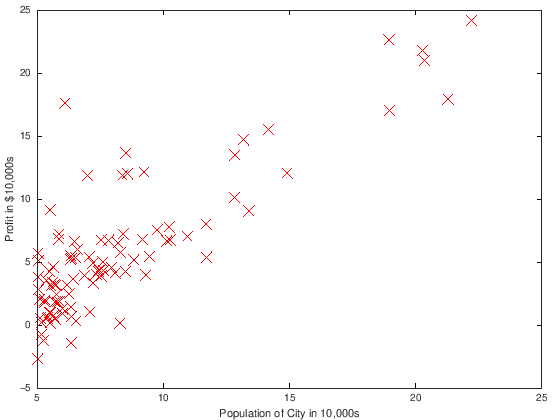

In [1]:
fprintf('Plotting Data ...\n')
data = load('ex1data1.txt');
X = data(:, 1); y = data(:, 2);
m = length(y); % number of training examples

% Plot Data
% Note: You have to complete the code in plotData.m
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =================== Part 3: Cost and Gradient descent ===================

X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;


In [11]:
predictions = X*theta;              % predictions of hypothesis on examples
sqrErrors   = (predictions - y).^2; % squared errors

predictions
sqrErrors
sum(sqrErrors)
J = 1/(2*m) * sum(sqrErrors);
J

predictions =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0

sqrErrors =

   309.478464
    83.360552
   186.650244
   140.517316
    46.557423
   141.276996
    18.907713
   144.000000
    43.542842
    14.566436
    10.576805
   240.405025
     9.954656
    52.212186
     0.512914
    12.340466
    28.140903
     0.314463
    13.335643
    29.044554
     9.850810
   473.802289
    18.173169
    26.910156
     9.501806
   512.479044
   182.277001
    49.655981
   215.854864
   583.077609
     1.488400
    35.959212
   147.233956
     3.420650
    42.805

In [14]:
X
y
Xtheta = X*[0 ; 0]
Xtheta
Xthetay = Xtheta-y
Xthetaysqr = Xthetay.^2

sum(Xthetaysqr)
1/(2*m) * sum(Xthetaysqr)

X =

    1.0000    6.1101
    1.0000    5.5277
    1.0000    8.5186
    1.0000    7.0032
    1.0000    5.8598
    1.0000    8.3829
    1.0000    7.4764
    1.0000    8.5781
    1.0000    6.4862
    1.0000    5.0546
    1.0000    5.7107
    1.0000   14.1640
    1.0000    5.7340
    1.0000    8.4084
    1.0000    5.6407
    1.0000    5.3794
    1.0000    6.3654
    1.0000    5.1301
    1.0000    6.4296
    1.0000    7.0708
    1.0000    6.1891
    1.0000   20.2700
    1.0000    5.4901
    1.0000    6.3261
    1.0000    5.5649
    1.0000   18.9450
    1.0000   12.8280
    1.0000   10.9570
    1.0000   13.1760
    1.0000   22.2030
    1.0000    5.2524
    1.0000    6.5894
    1.0000    9.2482
    1.0000    5.8918
    1.0000    8.2111
    1.0000    7.9334
    1.0000    8.0959
    1.0000    5.6063
    1.0000   12.8360
    1.0000    6.3534
    1.0000    5.4069
    1.0000    6.8825
    1.0000   11.7080
    1.0000    5.7737
    1.0000    7.8247
    1.0000    7.0931
    1.0000    5.0702
    1.00

In [15]:
fprintf('\nTesting the cost function ...\n')
% compute and display initial cost
J = computeCost(X, y, theta);
fprintf('With theta = [0 ; 0]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 32.07\n');


% further testing of the cost function
J = computeCost(X, y, [-1 ; 2]);
fprintf('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 54.24\n');


Testing the cost function ...
J =  32.073
With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07
J =  54.242

With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24


In [ ]:
fprintf('Program paused. Press enter to continue.\n');
pause;

fprintf('\nRunning Gradient Descent ...\n')
% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);
fprintf('Expected theta values (approx)\n');
fprintf(' -3.6303\n  1.1664\n\n');

% Plot the linear fit
hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression')
hold off % don't overlay any more plots on this figure

% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n',...
    predict1*10000);
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n',...
    predict2*10000);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% ============= Part 4: Visualizing J(theta_0, theta_1) =============
fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];
	  J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);


Program paused. Press enter to continue.


Paused, enter any value to continue 



Running Gradient Descent ...
error: 'X' undefined near line 2 column 25
Theta found by gradient descent:
error: 'theta' undefined near line 1 column 17
Expected theta values (approx)
 -3.6303
  1.1664

error: 'X' undefined near line 1 column 6
    legend at line 426 column 9
error: 'theta' undefined near line 2 column 22
error: 'predict1' undefined near line 2 column 5
error: 'theta' undefined near line 1 column 21
error: 'predict2' undefined near line 2 column 5
Program paused. Press enter to continue.


In [12]:
A=rand(4,1)*10
B=rand(4,1)*10
A.*B
A'*B
A*B'

A =

   6.9980
   9.2323
   4.6004
   1.0108

B =

   3.6848
   9.6275
   2.8276
   6.8840

ans =

   25.7862
   88.8836
   13.0083
    6.9583

ans =  134.64
ans =

   25.7862   67.3732   19.7877   48.1742
   34.0190   88.8836   26.1054   63.5549
   16.9516   44.2906   13.0083   31.6693
    3.7246    9.7314    2.8581    6.9583

